In [ ]:
!nvidia-smi

Tue Feb 25 18:29:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

***Dataset Iris - Supervised Learning - Klasifikasi ***

In [ ]:
import pandas as pd
from sklearn import datasets

# Memuat dataset Wine dari scikit-learn
data = datasets.load_iris()

X = data.data    # inputan untuk machine learning
y = data.target  # output yang dinginkan dari machine learning

# Mengonversi data fitur dan target menjadi DataFrame
df_X = pd.DataFrame(data.data, columns=data.feature_names)
df_y = pd.Series(y, name='target')

In [ ]:
df_X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df_y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
# Gabungkan fitur dan target dalam satu DataFrame
df = pd.concat([df_X, df_y], axis=1)

df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [ ]:
print("The unique number of data values are")
df.nunique()

The unique number of data values are


,0
sepal length (cm),35
sepal width (cm),23
petal length (cm),43
petal width (cm),22
target,3


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

In [ ]:
round(178*0.2)

36

In [ ]:
round(178*0.8)

142

In [ ]:
# tipe datanya itu termasuk supervised atau unsupervised
# klasifikasi atau regresi --> supervised
# clustering --> unsupervised

from sklearn.linear_model import LogisticRegression
# Membuat dan melatih model Decision Tree
model = LogisticRegression(max_iter=200)  # max_iter agar tidak terjadi warning konvergensi
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 4. Memprediksi dan mengevaluasi
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Laporan Klasifikasi:")
print(f"Akurasi: {accuracy * 100:.2f}%")

Laporan Klasifikasi:
Akurasi: 100.00%


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy: {:.2f}%".format(cv_scores.mean() * 100))


Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean CV Accuracy: 97.33%



Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


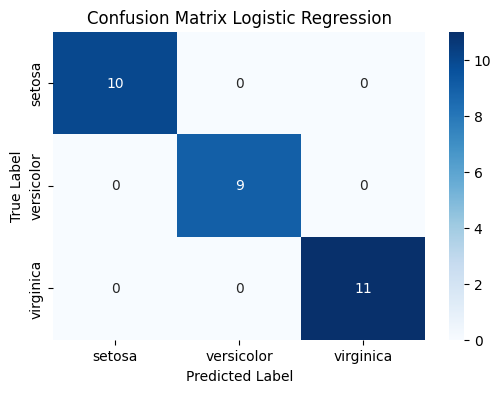

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 6. Menampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# 7. Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Logistic Regression")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred, target_names=data.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

